<a href="https://colab.research.google.com/github/Carlys222/UNIDAD-2/blob/main/PROYECTO_U2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

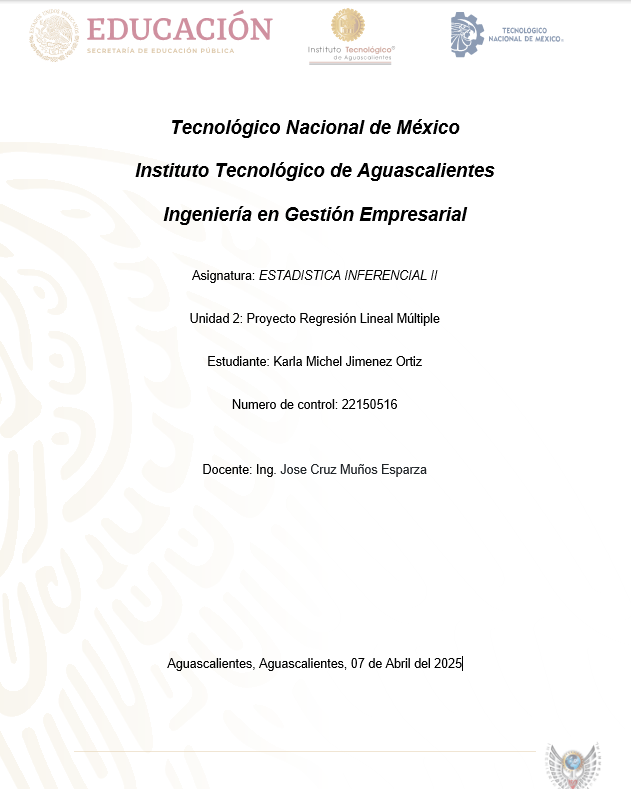

# Introducción:

En la era digital actual, las empresas se enfrentan al reto constante de elegir las estrategias publicitarias más efectivas para captar clientes y aumentar sus ventas. Las plataformas como YouTube y Facebook han transformado la forma en que se entrega la publicidad, permitiendo un mayor alcance y segmentación de audiencias. No obstante, los medios tradicionales como la prensa escrita (newspaper) aún se utilizan, especialmente en ciertos nichos de mercado.

Este estudio tiene como objetivo analizar y comparar el impacto de tres canales de publicidad los cuales son los siguientes YouTube, Facebook y Newspaper sobre las ventas, utilizando herramientas de análisis estadístico. La finalidad es determinar cuáles de estos canales tienen una influencia significativa en las ventas y en qué medida lo hacen. Para ello, se utilizará un modelo de regresión lineal múltiple, acompañado de técnicas como análisis de correlación, análisis de varianza (ANOVA), y pruebas estadísticas para validar la calidad del modelo.

# Hipótesis

Este estudio se enfoca en evaluar si existe una relación significativa entre las inversiones publicitarias en distintos medios y el nivel de ventas alcanzado. Se plantean las siguientes hipótesis:

Hipótesis nula (H₀): Las inversiones en publicidad en YouTube, Facebook y Newspaper no tienen un impacto significativo en las ventas.

Hipótesis alternativa (H₁): Al menos una de las inversiones publicitarias en YouTube, Facebook o Newspaper tiene un impacto significativo en las ventas.

El análisis estadístico permitirá comprobar si se puede rechazar la hipótesis nula y concluir que existe una relación entre las variables.

# Marco teórico

La publicidad ha sido históricamente una de las herramientas clave dentro del mix de marketing. Con el crecimiento del entorno digital, los canales de comunicación han evolucionado, y con ello también las formas en que las marcas interactúan con los consumidores. Plataformas como YouTube y Facebook ofrecen una segmentación altamente precisa, lo que ha permitido a las empresas optimizar sus campañas y aumentar la conversión de clientes potenciales en compradores reales.

En contraste, los medios impresos como los periódicos han mostrado una tendencia decreciente en términos de alcance y efectividad. No obstante, algunos estudios sugieren que todavía pueden tener un impacto relevante en ciertos públicos objetivos.

Desde el punto de vista estadístico, el uso de regresión lineal múltiple permite estudiar el efecto simultáneo de múltiples variables independientes (inversiones en medios publicitarios) sobre una variable dependiente (ventas). Para validar la fiabilidad del modelo, se emplean análisis de correlación, pruebas de heterocedasticidad y análisis de varianza (ANOVA).

# Metodología

Se siguió una metodología cuantitativa y exploratoria, basada en los siguientes pasos:

Recolección de datos
Se utilizaron datos de un archivo llamado Marketing_Data.csv, con 171 registros que incluyen las siguientes variables:

*   YouTube: Inversión publicitaria en esta plataforma
*   Facebook: Inversión publicitaria en Facebook.
*   Newspaper: Inversión publicitaria en periódicos.
*   Sales: Ventas generadas.

Limpieza de datos
Se eliminaron todos los registros con valores nulos utilizando df.dropna().

Análisis exploratorio
Se realizaron gráficos de distribución para cada variable, y un mapa de calor para analizar la correlación entre ellas.

Datos atípicos:
Según los histogramas generados en el análisis, no se detectaron datos atípicos ("no existen datos atípicos") en ninguna de las variables (youtube, facebook, newspaper, sales). Esto indica una distribución relativamente normal y sin valores extremos que distorsionen el análisis.

Correlación
Se generó una matriz de correlación, visualizada mediante un mapa de calor.

Modelo de regresión
Se utilizó una regresión lineal múltiple.

Se dividieron los datos en conjunto de entrenamiento (80%) y prueba (20%), y se entrenó el modelo utilizando statsmodels.

In [67]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Carlys222/UNIDAD-2/refs/heads/main/Marketing_Data.csv')
df.dropna(inplace=True)
df

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
...,...,...,...,...
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60


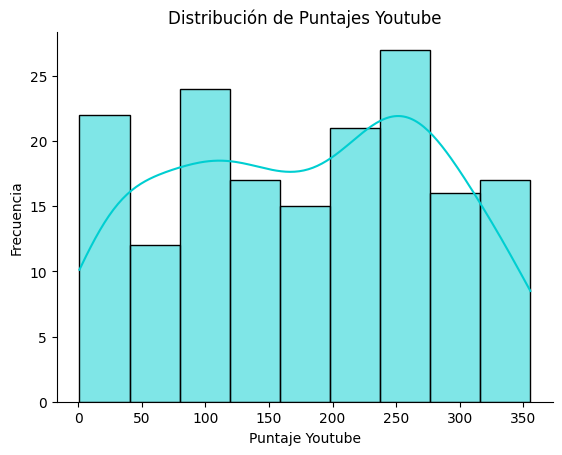

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['youtube'], kde = True, color = 'darkturquoise')

plt.xlabel('Puntaje Youtube')
plt.ylabel('Frecuencia')
plt.title('Distribución de Puntajes Youtube')


plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# NO EXISTEN DATOS ATIPICOS

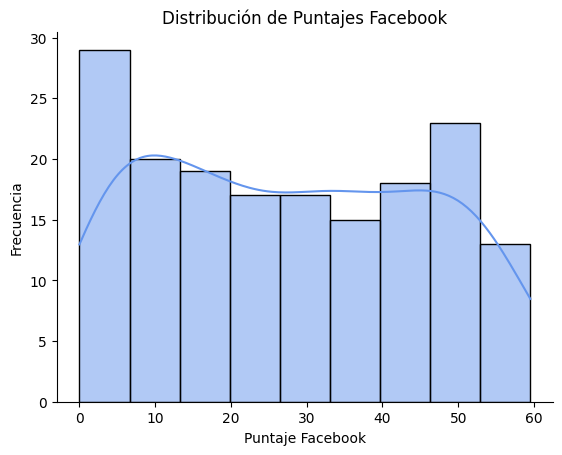

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['facebook'], kde = True, color = 'cornflowerblue')

plt.xlabel('Puntaje Facebook')
plt.ylabel('Frecuencia')
plt.title('Distribución de Puntajes Facebook')


plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# no existen datos atipocos

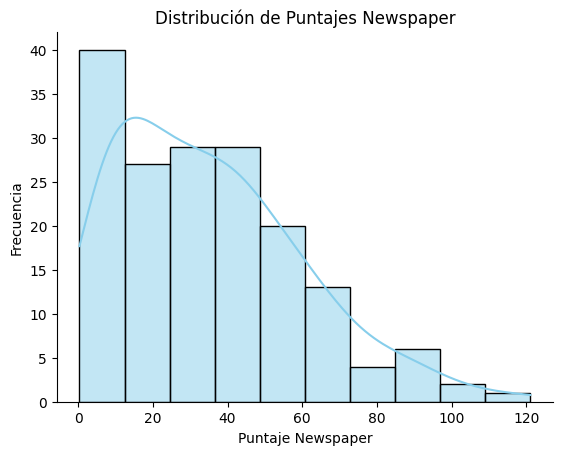

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['newspaper'], kde = True, color = 'skyblue')

plt.xlabel('Puntaje Newspaper')
plt.ylabel('Frecuencia')
plt.title('Distribución de Puntajes Newspaper')


plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# no existen datos atipocos

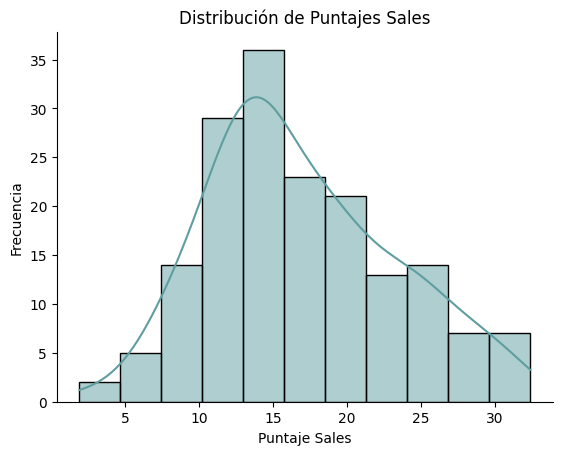

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['sales'], kde = True, color = 'cadetblue')

plt.xlabel('Puntaje Sales')
plt.ylabel('Frecuencia')
plt.title('Distribución de Puntajes Sales')


plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# no existen datos atipocos

Nuestra variable dependiente sera sales que reprecenta ventas , las variables independientes seran youtube, facebook y newspaper

# Mapa de calor

Text(0.5, 1.0, 'Mapa de calor, Matriz de correlacion')

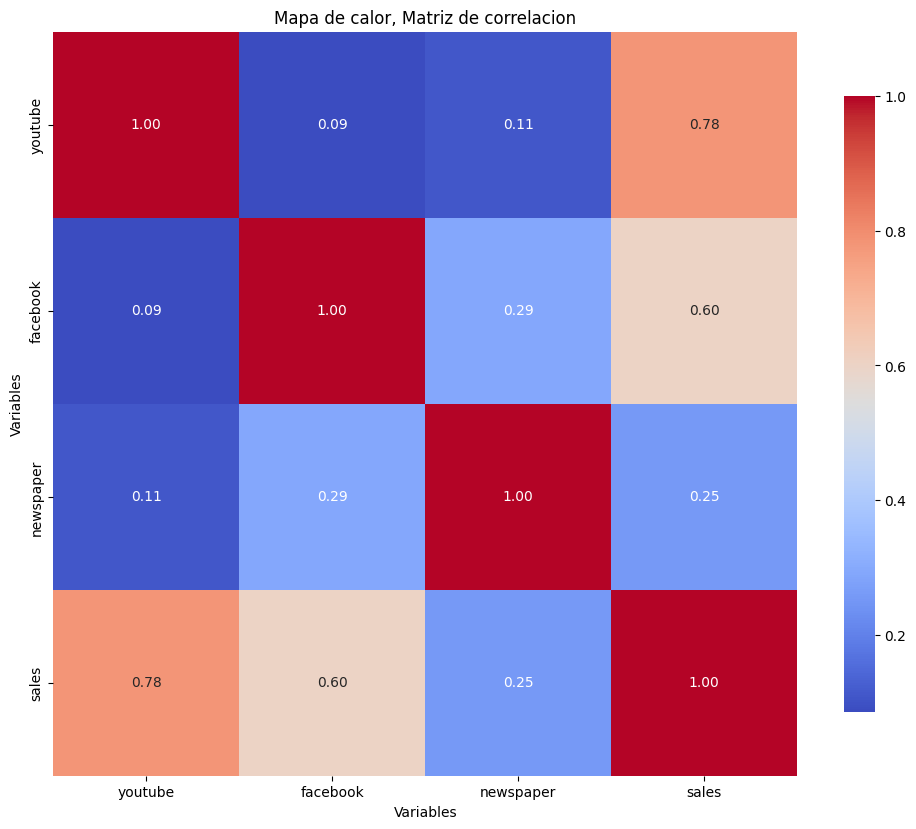

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
matriz_de_correlacion = df.corr()
plt.figure(figsize = (12, 10))
sns.heatmap(matriz_de_correlacion, annot = True, cmap = 'coolwarm', fmt = '.2f', square = True, cbar_kws={'shrink': 0.8})
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.title('Mapa de calor, Matriz de correlacion')


El mapa de calor demuestra lo siguiente

*   YouTube tiene la mayor correlación con las ventas (0.78), lo que indica que es el canal publicitario más relacionado con un aumento en ventas.

*   Facebook también tiene una correlación moderada (0.60) con las ventas, por lo que influye positivamente, aunque menos que YouTube.

*   Newspaper (periódico) muestra una correlación débil (0.25), lo que sugiere que su impacto en las ventas es bajo o poco significativo.












Coeficiente de determinacion:  0.8729
coeficiente de correlacion:  0.9351


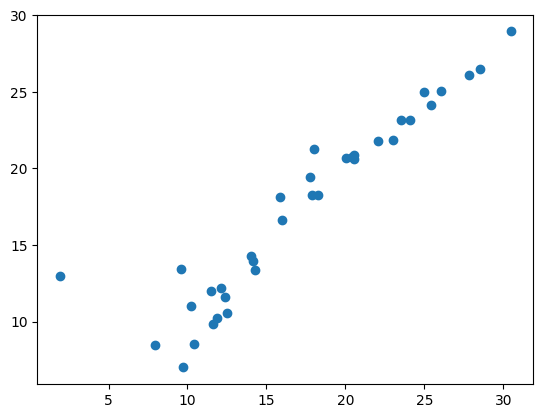

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

X = df[['youtube', 'facebook', 'newspaper']]
Y = df['sales']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

X_train_constante = sm.add_constant(X_train)
X_test_constante = sm.add_constant(X_test)

modelo = sm.OLS(Y_train, X_train_constante).fit()


Yc = modelo.predict(X_test_constante)

plt.scatter(Y_test, Yc)

r2 = r2_score(Y_test, Yc)
print(f'Coeficiente de determinacion: {r2: 0.4f}')

from scipy.stats import pearsonr
r,_ = pearsonr(Y_test, Yc)
print(f'coeficiente de correlacion: {r: 0.4f}')

Coeficiente de determinación (R² = 0.8729):
Significa que el 87.29% de la variabilidad en las ventas (sales) puede ser explicada por el modelo que construiste usando las variables youtube, facebook y newspaper.

Mientras que el Coeficiente de correlación de Pearson (r = 0.9351):
Indica que existe una fuerte relación lineal positiva entre los valores reales de ventas (Y_test) y las predicciones del modelo (Yc).

Como r está muy cerca de 1, significa que las predicciones del modelo siguen muy de cerca el comportamiento real de los datos.


# Extrae la ecuación de regresión múltiple



In [74]:
b0, b1, b2, b3, = modelo.params

Fun = lambda x1, x2, x3: b0 + b1*x1 + b2*x2 + b3*x3

Fun(100, 40, 80)
# Si la empresa invierte esos valores en publicidad, se espera obtener 15.90 en ventas, según el comportamiento aprendido por el modelo con los datos.

15.897006244313419

In [75]:
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(modelo.resid, X_train_constante)
print(f'Valor-p de Breusch-Pagan: {valor_p_bp: 0.4f}')

Valor-p de Breusch-Pagan:  0.2386


Como 0.2386 > 0.05, podemos decir:
Los errores del modelo parecen estables. Todo está bien, el modelo cumple con ese requisito.

Si es menor a 0.05, significa que  los residuos no tienen varianza constante lo que indica un problema en el modelo , sí hay heterocedasticidad (malo).

> Si es mayor a 0.05, significa que todo está bien (no hay heterocedasticidad).



In [76]:
from statsmodels.formula.api import ols

moedo_2 = ols(formula = 'sales ~ youtube + facebook + newspaper', data = df).fit()
tabla_anova = sm.stats.anova_lm(moedo_2, typ = 2)  # ANOVA de una via
tabla_anova

,sum_sq,df,F,PR(>F)
youtube,3594.671630,1.0,889.821458,8.307874e-69
facebook,1763.824226,1.0,436.615303,1.830754e-48
newspaper,1.750370,1.0,0.433285,5.112879e-01
Residual,674.641139,167.0,NaN,NaN


> Youtube

El valor p es extremadamente bajo (8.31e-69), lo que indica que hay una diferencia estadísticamente significativa entre las medias de las categorías de youtube. Esto significa que youtube tiene un efecto significativo en la variable dependiente.


> Facebook

Similar al caso de youtube, el valor p es extremadamente bajo (1.83e-48), lo que también indica que facebook tiene un efecto significativo en la variable dependiente.


> Newspaper

El valor p de 0.511 es mucho mayor que 0.05, lo que indica que no hay una diferencia significativa en las medias de las categorías de newspaper. En este caso, newspaper no tiene un efecto significativo en la variable dependiente.



Los residuales reflejan la parte de la variabilidad que no puede ser atribuida a los factores evaluados en tu análisis. En este caso, como los factores de youtube y facebook son significativos, es razonable pensar que las diferencias no explicadas por estos factores son las que están incluidas en los residuales.



# Conclusión
El análisis estadístico demuestra que las plataformas de publicidad digital, especialmente YouTube y Facebook, tienen un impacto significativo en las ventas de una empresa. La inversión en estos canales permite explicar una gran parte de la variabilidad observada en los niveles de ventas, y su inclusión en campañas de marketing es altamente recomendable.

Por otro lado, la inversión en medios tradicionales como los periódicos no muestra un efecto considerable, lo cual coincide con las tendencias actuales de digitalización y cambio en los hábitos de consumo de medios.

Además, el modelo estadístico empleado (regresión lineal múltiple) mostró un excelente desempeño, con un coeficiente R² alto, sin presencia de heterocedasticidad, y con variables predictoras bien definidas. Se concluye que este modelo puede ser una herramienta útil para la planificación estratégica en el área de marketing.